In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [2]:
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

In [3]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [4]:
chessGames = pd.read_csv('Datasets/assignment4.csv', sep=',')
chess_train, chess_test = train_test_split(chessGames, test_size=0.3, stratify=chessGames['rated'])
print(chess_train.shape, chess_test.shape)

(14040, 16) (6018, 16)


In [5]:
features = ['turns', 'white_rating', 'opening_ply']
dt = DecisionTreeRegressor(max_depth=25) # Increase max_depth to see effect in the plot
dt.fit(chess_train[features], chess_train['black_rating'])

DecisionTreeRegressor(max_depth=25)

In [6]:
predictionsOnTrainset = dt.predict(chess_train[features])
predictionsOnTestset = dt.predict(chess_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, chess_train.black_rating)
rmseTest = calculate_rmse(predictionsOnTestset, chess_test.black_rating)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 49.23144069915061
RMSE on test set 294.46743396563573


The Root Mean Square Error is a lot smaller when running predictions on the training data when comparing to the predictions on the test data, where the error is almost 6 times as large.

A difference in the error was expected, because the training data was previously seen, while the test data was not. It wasn't expected that difference in size of the error would be this big.

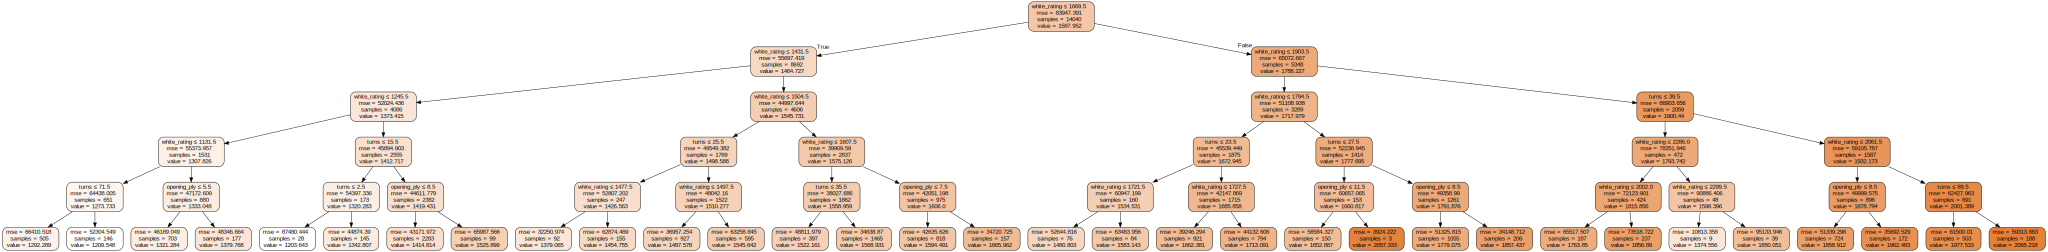

In [7]:
dtVisual = DecisionTreeRegressor(max_depth=5) # Lower max_depth to be able to run the plot_tree_regression function.
dtVisual.fit(chess_train[features], chess_train['black_rating'])
plot_tree_regression(dtVisual, features)

The decision tree seems to try to make sure the mean squared error (mse) is as small as possible, and uses this to find out what condition should be used for a given node in the decision tree. 

The decision tree continues to divide the sample, until either the mse is 0.0, or the max depth of the tree is reached.